In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
proj = '51V'
trg = '147Sm'
cn = '198At'
bf = 0.67
ch = 'xn'

file_name10 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + str(bf) + '.dat'
file_name0 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_' + 'barfac' + str(bf) + '.dat'
print(file_name10, file_name0)

51V_147Sm_198At_xn_IFUS10_barfac0.67.dat 51V_147Sm_198At_xn_IFUS0_barfac0.67.dat


In [22]:
df10 = pd.read_csv('data/' + file_name10, sep='\t')
df0 = pd.read_csv('data/' + file_name0, sep='\t')

In [23]:
df10.head()

,E_lab,E*/MeV,192At,193At,194At,195At,196At,197At,198At
0,196.101,21.0,0.0,0.0,0.0,0.0,1.010000e-10,8.290000e-09,1.760000e-11
1,197.448,22.0,0.0,0.0,0.0,0.0,2.210000e-09,2.290000e-08,3.460000e-11
2,198.795,23.0,0.0,0.0,0.0,0.0,2.480000e-08,6.060000e-08,6.380000e-11
3,200.142,24.0,0.0,0.0,0.0,0.0,2.120000e-07,1.530000e-07,1.070000e-10
4,201.489,25.0,0.0,0.0,0.0,0.0,1.540000e-06,3.690000e-07,1.100000e-10


In [24]:
exp_data = pd.read_csv('data/exp_data.dat', sep=' ')

In [25]:
dfm10_mb = df10.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm_exp = exp_data.melt(id_vars=['E'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
dfm10_mb.head()

,E_lab,E*/MeV,isotope,CS
0,196.101,21.0,192At,0.0
1,197.448,22.0,192At,0.0
2,198.795,23.0,192At,0.0
3,200.142,24.0,192At,0.0
4,201.489,25.0,192At,0.0


/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


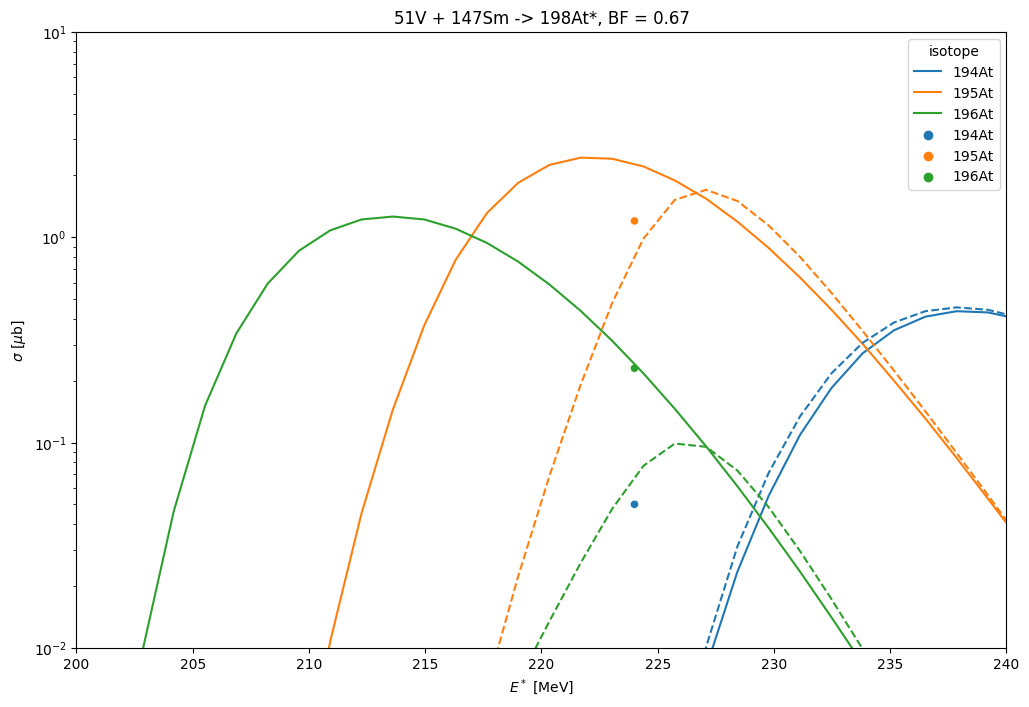

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[4:-2]))])
plt.semilogy()
plt.ylim(1e-2, 1e1)
# plt.xlim(right=50)
# plt.xlim(20, 80)
plt.xlim(200, 240)
plt.title(proj + ' + ' + trg + ' -> ' + cn + '*, BF = ' + str(bf))
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[4:-2]))], linestyle='--', legend=None)

sns.scatterplot(x='E', y='CS', hue='isotope', data=dfm_exp)

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + str(bf) + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + str(bf) + '.pdf')